In [3]:
from features_trans_back import features_trans_back_shortened as ftbs
from features_trans_back import question_short as qs


def plot_conditional_probs(df, condition, ftbs, qs):
    # Data for the plot
    categories = ftbs(df.keys().name)
    categories_labels = list(categories.values())

    event_qs = df.keys().name

    condition_qs = df.reset_index().columns[0]

    # Creating the plot
    plt.figure(figsize=(10, 6))
    plt.bar(categories_labels, df.loc[condition], color='skyblue')

    # Adding title and labels
    plt.title(f"Distribution: {qs(event_qs)}  | {qs(condition_qs)}  {ftbs(condition_qs, condition)}" )
    # plt.xlabel("Education Degree")
    plt.ylabel("Conditional Probabilities")

    # Rotating the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    # plt.show()



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('coded.csv')
def calculate_conditional_probability_for_category(df, condition_column, condition_value, event_column, event_value):
    """
    Calculate conditional probability for a specific category in the condition column given the event column.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - condition_column (str): The column for which conditional probability is calculated.
    - condition_value: The specific category in the condition column.
    - event_column (str): The column representing the event.
    - event_value: The specific category in the event column.
    """
    condition_occurrences = df[df[condition_column] == condition_value].shape[0]
    event_and_condition_occurrences = df[(df[condition_column] == condition_value) & (df[event_column] == event_value)].shape[0]

    if condition_occurrences == 0:
        return 0  # To avoid division by zero

    conditional_probability = event_and_condition_occurrences / condition_occurrences
    return conditional_probability



def calculate_conditional_probability(df, condition_column, event_column):
    # Group by the condition column and calculate the conditional probabilities
    
    probabilities = df.groupby(condition_column)[event_column].value_counts(normalize=True).unstack()
    # print(probabilities)

    # Fill NaN values with 0 (when the condition is not present for a specific event)
    probabilities = probabilities.fillna(0)

    return probabilities



def cramers_v(df, x, y):
    confusion_matrix = pd.crosstab(df[x], df[y])

    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


# cramers_v_education_obligation = cramers_v(df, "Education", "Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?")
# print(cramers_v_education_obligation)


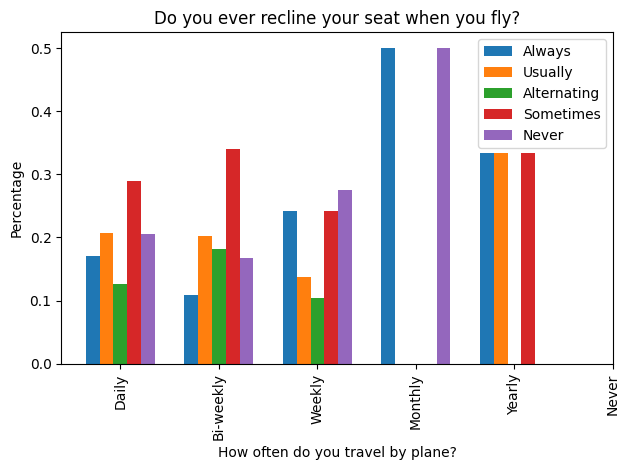

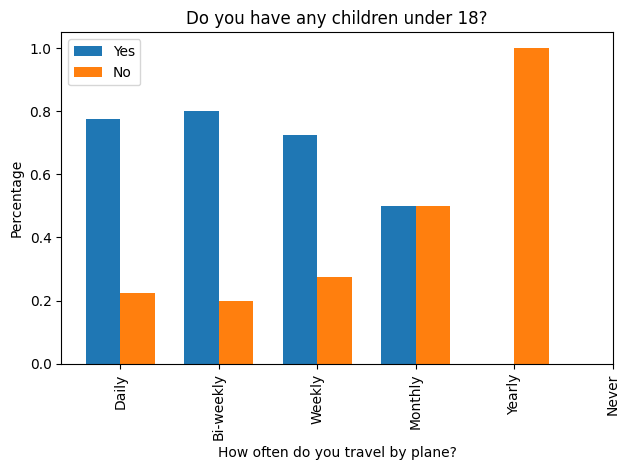

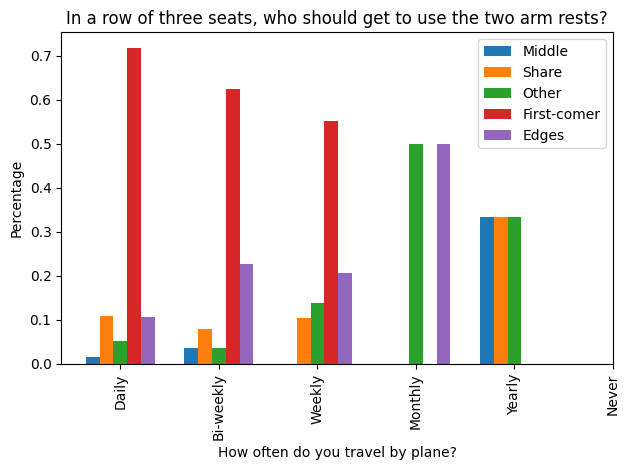

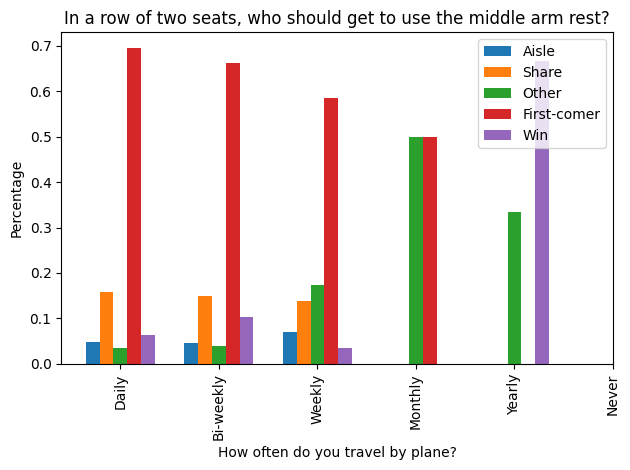

In [5]:
def many_plots (df, feature, calculate_conditional_probability, plot_conditional_probs, ftbs, qs):
    questions = list(df.columns)[1:]
    counter = 0 
    for q in questions:
        if q == feature:
            continue
        if q == 'How tall are you?':
            continue
        conditional_prob = calculate_conditional_probability(df, feature, q)
        
        # Assuming your DataFrames are named conditional_prob and conditional_prob2

        # Plot for 'Do you ever recline your seat when you fly?'

        # plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
        # plt.subplot(1, 2, 1)  # subplot for the first question
        conditional_prob.plot(kind='bar', stacked=False, width=0.7)
        plt.title(conditional_prob.columns.name)
        plt.xlabel(conditional_prob.index.name)
        plt.ylabel('Percentage')
        feature_name = ftbs(conditional_prob.columns.name)
        q_name = ftbs(conditional_prob.index.name)
        plt.xticks(range(len(q_name)), list(q_name.values()))
        plt.legend(list(feature_name.values()))

        plt.tight_layout()  # Adjust layout for better visualization
        plt.show();
        if counter==3:
            break
        counter+=1
many_plots(df, 'How often do you travel by plane?', calculate_conditional_probability, plot_conditional_probs, ftbs, qs)


In [6]:
df = pd.read_csv('coded.csv')
conditional_prob = calculate_conditional_probability(df, 'Age', list(df.columns)[2])
conditional_prob2 = calculate_conditional_probability(df, 'Age', list(df.columns)[4])
print(conditional_prob)
print(conditional_prob2)

print(conditional_prob.index.name)

Do you ever recline your seat when you fly?       0.0       1.0       2.0  \
Age                                                                         
0.0                                          0.122093  0.156977  0.122093   
1.0                                          0.157658  0.234234  0.148649   
2.0                                          0.213675  0.175214  0.145299   
3.0                                          0.120930  0.255814  0.130233   

Do you ever recline your seat when you fly?       3.0       4.0  
Age                                                              
0.0                                          0.319767  0.279070  
1.0                                          0.288288  0.171171  
2.0                                          0.299145  0.166667  
3.0                                          0.302326  0.190698  
Do you have any children under 18?       0.0       1.0
Age                                                   
0.0                            

How often do you travel by plane?                   1         2         3  \
Do you ever recline your seat when you fly?                                 
0.0                                          0.773723  0.160584  0.051095   
1.0                                          0.737143  0.234286  0.022857   
2.0                                          0.661017  0.313559  0.025424   
3.0                                          0.700389  0.268482  0.027237   
4.0                                          0.748538  0.198830  0.046784   

How often do you travel by plane?                   4         5  
Do you ever recline your seat when you fly?                      
0.0                                          0.007299  0.007299  
1.0                                          0.000000  0.005714  
2.0                                          0.000000  0.000000  
3.0                                          0.000000  0.003891  
4.0                                          0.005848  0.000000 

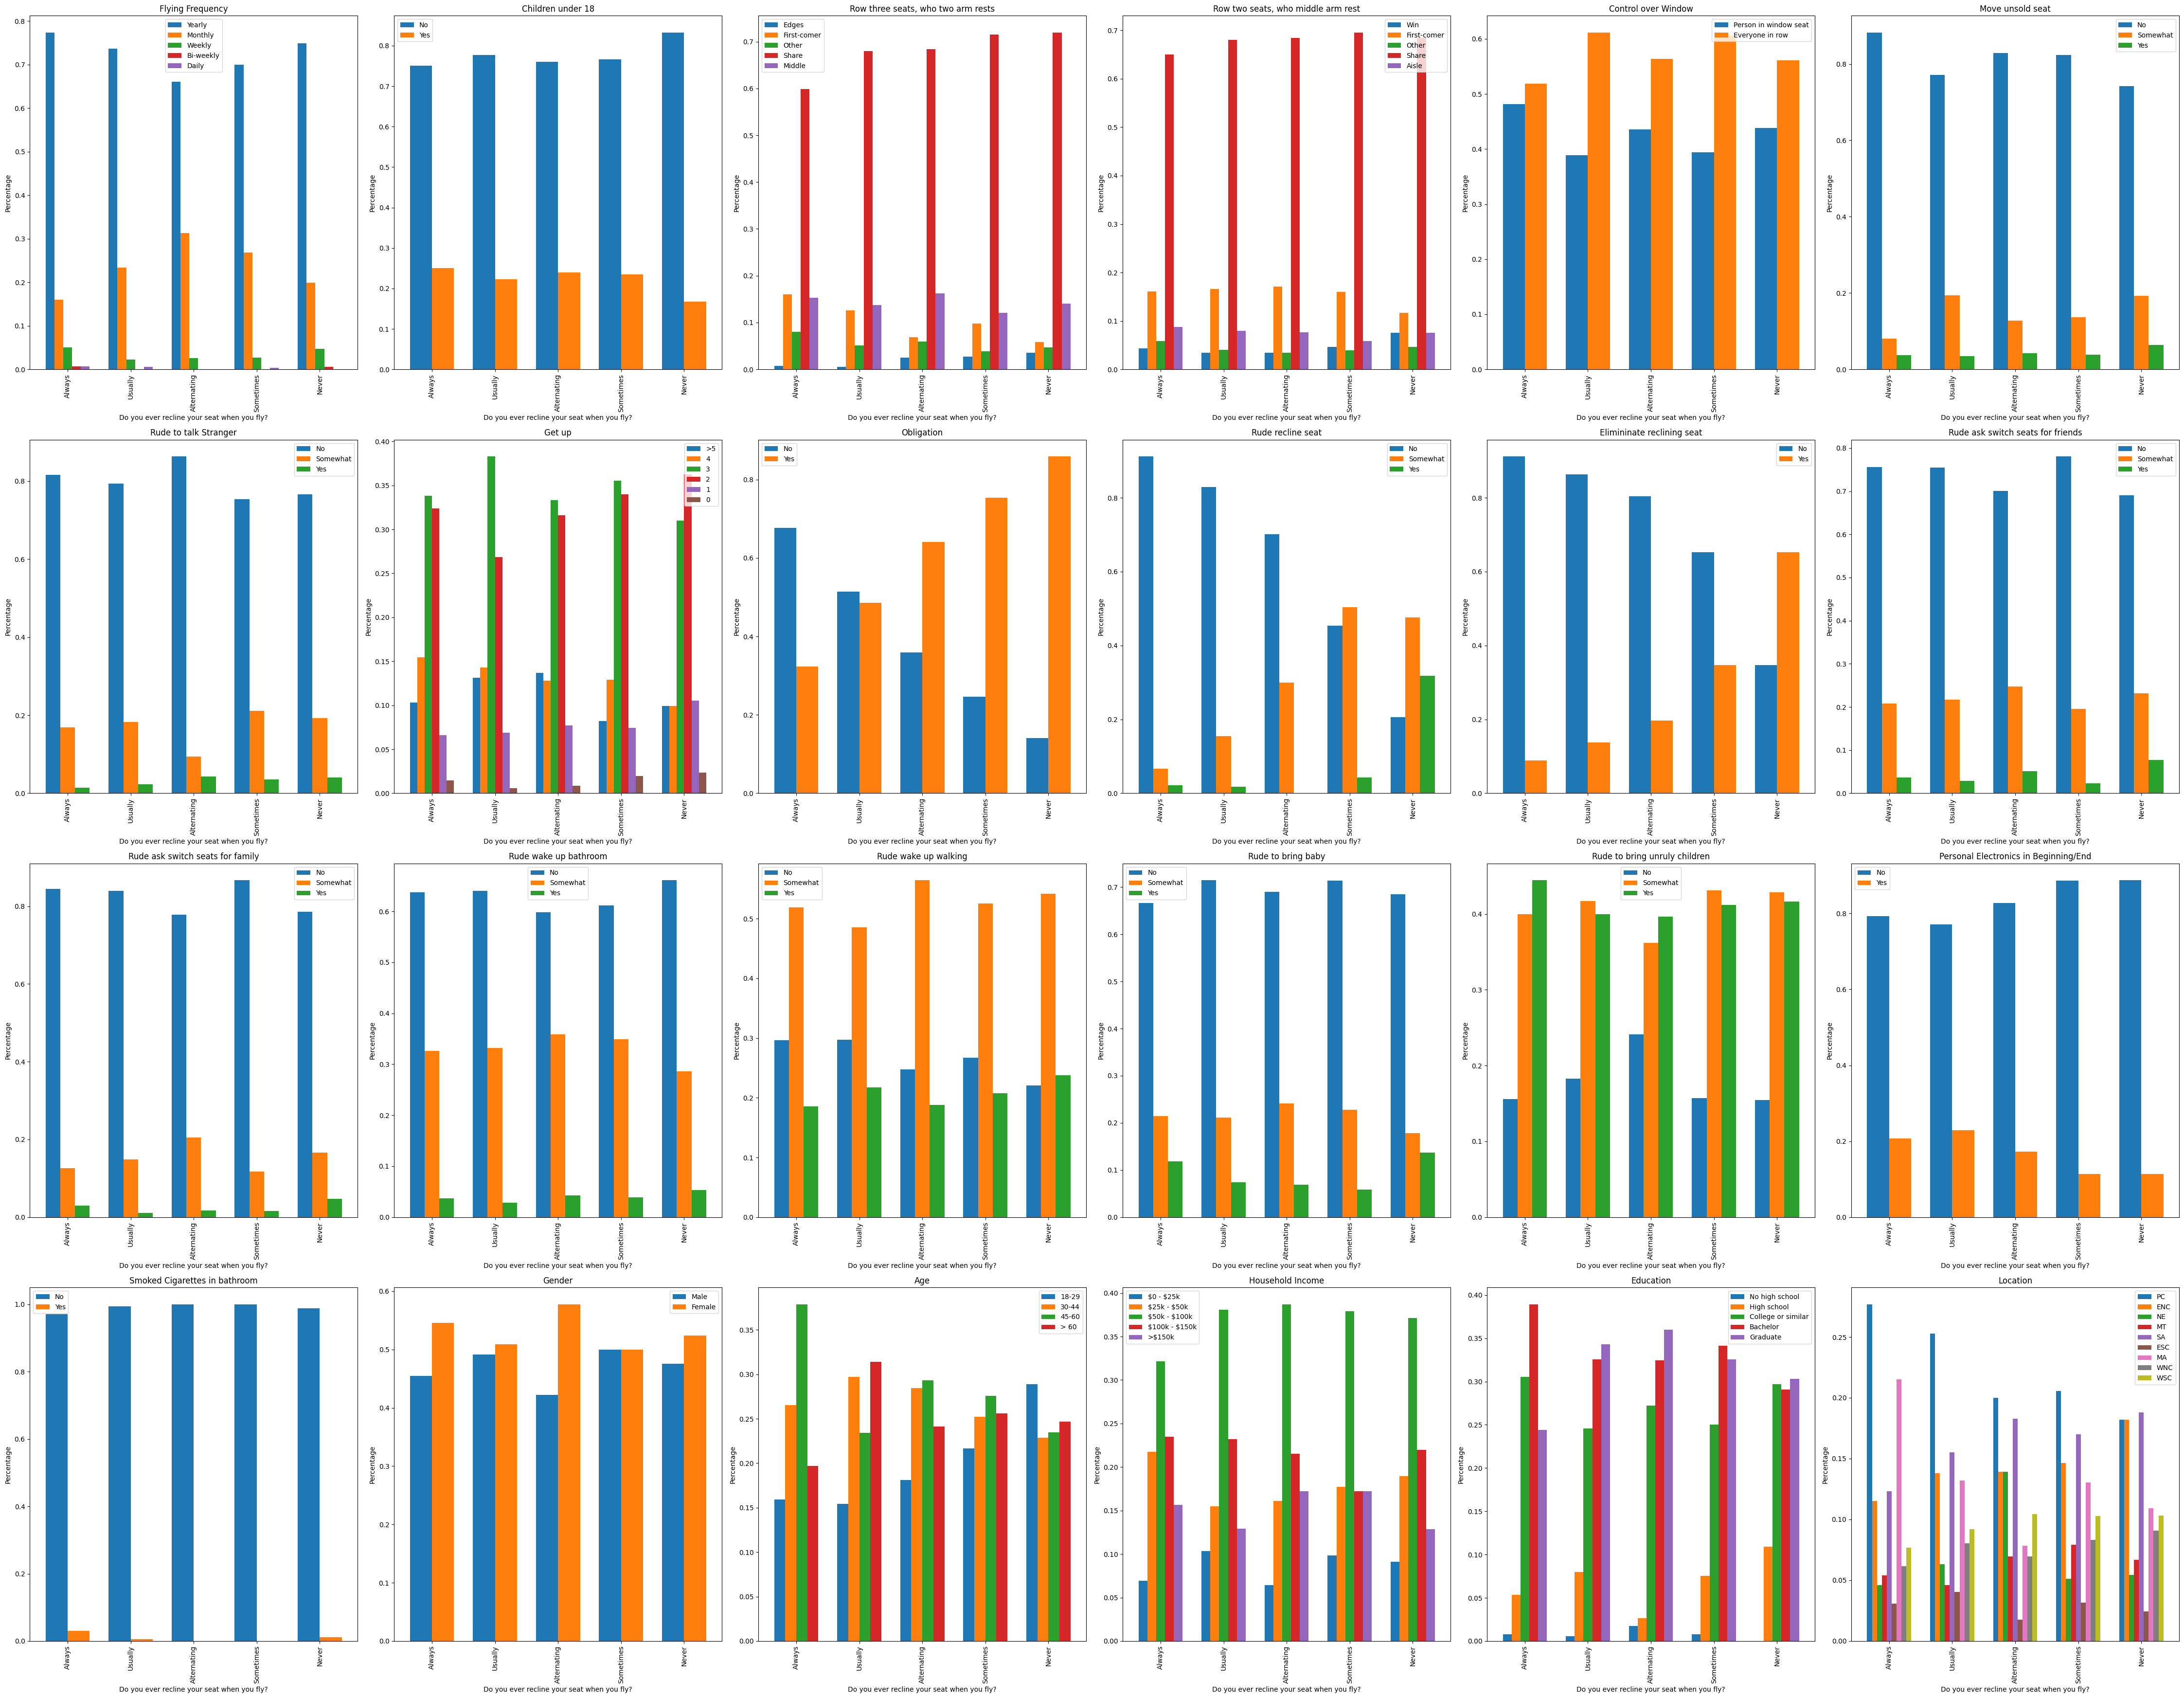

In [12]:
from features_trans_back import features_trans_back_shortened  as ftbs
from features_trans_back import question_short as qs
def many_plots (df, feature, calculate_conditional_probability, ftbs, qs):
    questions = list(df.columns)[1:]
    counter = 0 
    fig, ax = plt.subplots(4, 6, figsize=(45,35))
    ax_flat = ax.flatten()
    for q in questions:
        if q == feature:
            continue
        if q == 'How tall are you?':
            continue
        conditional_prob = calculate_conditional_probability(df, feature, q)

        ax = ax_flat[counter]
        
        conditional_prob.plot(kind='bar', stacked=False, width=0.7,ax=ax)
        print(conditional_prob)
        ax.set_title(qs(conditional_prob.columns.name))
        ax.set_xlabel(conditional_prob.index.name)
        ax.set_ylabel('Percentage')
        feature_name = ftbs(conditional_prob.columns.name)
        q_name = conditional_prob.index.name
        q_name_list = conditional_prob.index.tolist()
        
        answer_change = []
        for i in q_name_list:
            i = float(i)
            answer_change.append(ftbs(q_name, i))

        columns_list = []
        for i in conditional_prob.columns.tolist():
            i = float(i)
            columns_list.append(ftbs(conditional_prob.columns.name, i))

        ax.set_xticks(range(len(q_name_list)))
        ax.set_xticklabels(answer_change)
        ax.legend(columns_list)

        counter+=1
     
    plt.tight_layout()  # Adjust layout for better visualization
    plt.show()        
many_plots(df, 'Do you ever recline your seat when you fly?', calculate_conditional_probability, ftbs, qs)



['How often do you travel by plane?', 'Do you ever recline your seat when you fly?', 'How tall are you?', 'Do you have any children under 18?', 'In a row of three seats, who should get to use the two arm rests?', 'In a row of two seats, who should get to use the middle arm rest?', 'Who should have control over the window shade?', 'Is itrude to move to an unsold seat on a plane?', 'Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?', "On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?", 'Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?', 'Is itrude to recline your seat on a plane?', 'Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?', 'Is it rude to ask someone to switch seats with you in order to be closer to friends?', 'Is itrude to ask so

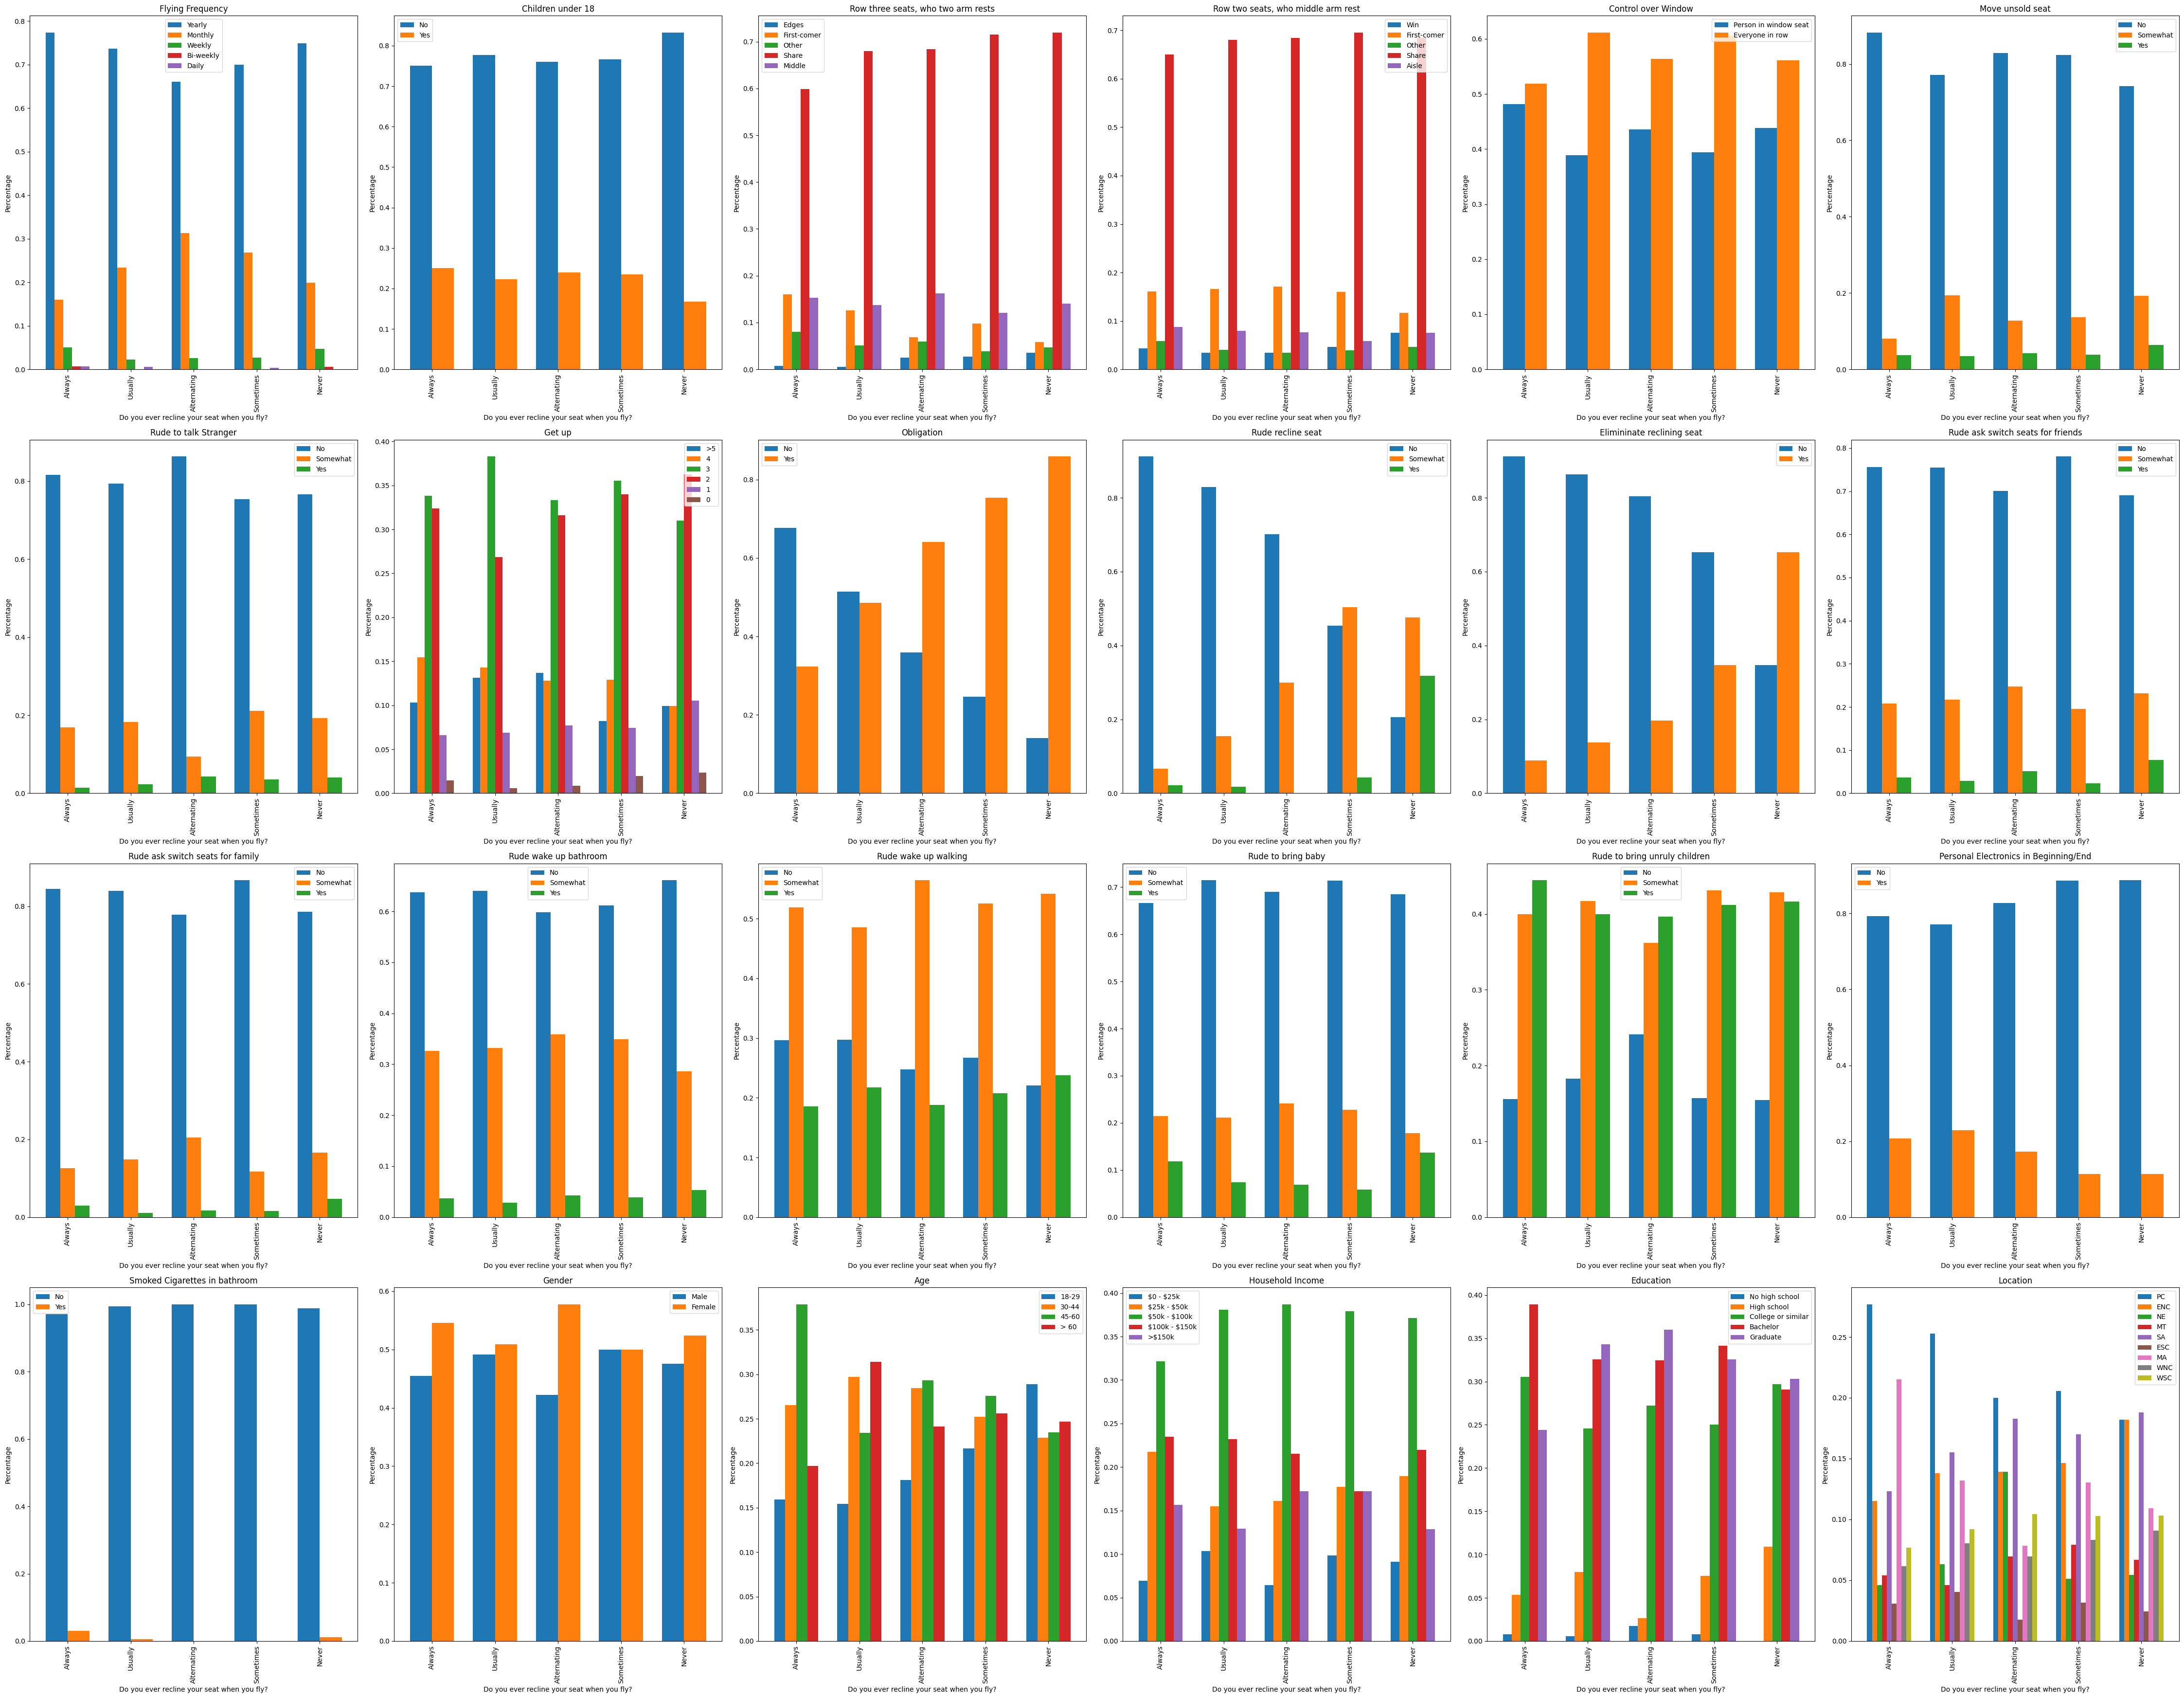

In [1]:
from create_plots_feature import MakeFeaturePlots
import pandas as pd

df = pd.read_csv('coded.csv')
feature = 'Do you ever recline your seat when you fly?'
age_plot = MakeFeaturePlots(df, feature)
print(age_plot.list_features())
age_plot.many_plots()

# df2.head()

In [9]:
get_feature = age_plot.list_features(0)
print(get_feature)

How often do you travel by plane?


In [10]:
df2 = pd.read_csv('flying-etiquette.csv')
df2['How often do you travel by plane?'].value_counts()

Once a year or less      633
Once a month or less     205
Never                    166
A few times per month     29
A few times per week       4
Every day                  3
Name: How often do you travel by plane?, dtype: int64